# 🎥 Gesture Segmentation Tutorial
This notebook demonstrates the workflow for gesture segmentation using a pre-trained model. 
It will guide you through the steps to:

1. **Extract** 2‑D pose keypoints from a video using [MediaPipe Pose](https://developers.google.com/mediapipe).
2. **Segment** the extracted skeletons with the gesture‑segmentation models.
3. **Export** the result to ELAN for convenient manual inspection

Let's start👇

In [60]:
# --- Library imports----------------------------------------------------
import sys
import pandas as pd
from moviepy.editor import VideoFileClip
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

import os
import pathlib

# Local modules
from test_segmentation import (
    parse_args,
    set_random_seed,
    train_with_config,
    get_config,
)
from utils.extract_mp_pose import extract_keypoints

# Add project root to PYTHONPATH 
PROJECT_ROOT = pathlib.Path.cwd()
if PROJECT_ROOT.as_posix() not in sys.path:
    sys.path.append(PROJECT_ROOT.as_posix())

print("✅ Environment initialised")


✅ Environment initialised


In [61]:
# I use these commands to make the notebook interactive and automatically reload modified modules)
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1️⃣ Extract pose keypoints
Specify the path to **your** video file below.  
Set `save_video=True` if you would like an overlay video with the skeleton drawn on top.

**NOTE if you want to use your own webcam video**:
- Make sure you have a webcam connected to your computer.
- Change the `video_path` to `"0"` (zero) to use the webcam as input.


In [62]:
# Path to the video you want to analyse
video_path = "input_videos/salma_hayek_short.mp4"  # or specify a path to your video file
# video_path = "input_videos/tedtalk.webm"  # Replace with your video file path
# video_path = 0 # ← use this to use your webcam as input

# Extract keypoints. The function returns a dictionary with useful metadata.
pose_data = extract_keypoints(
    vidf=video_path,
    save_video=True,
)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
I0000 00:00:1750258736.952735 19862849 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M3 Pro


Video resolution: 1920.0x1080.0, FPS: 29.97002997002997
Number of frames in the video: 1136


Processing frames:   0%|          | 0/1136 [00:00<?, ?frame/s]W0000 00:00:1750258737.015955 19997852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750258737.071410 19997858 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750258737.075113 19997850 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750258737.075219 19997852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750258737.075394 19997857 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750258737.

The dictionary contains:

* `output_path` – `*.npy` file with the keypoints  
* `video_output_path` – overlay video (optional)  
* `samplerate` – frames‑per‑second of the processed clip

## 2️⃣ Run gesture segmentation

The script below will load and run the gesture segmentation model on the extracted keypoints.

In [63]:
# --- Build CLI‑style arguments ---------------------------------------------
sys.argv = [
    "run_segmentation_test.py",
    "--config",  "config/segmentation/CABB_segment_basic_test.yaml",
    "--poses-path", pose_data["output_path"],
    "--phase",  "test",
    "--seed",   "42",
    "--devices", "0",
    "--models_type", "best"
]

# --- Parse and run ----------------------------------------------------------
opts = parse_args()
set_random_seed(opts.seed)
cfg = get_config(opts.config)

print(f"=== Running segmentation on {opts.poses_path} ===")
segmentation_results = train_with_config(cfg, opts)


Seed set to 42


=== Running segmentation on input_videos/salma_hayek_short.npy ===
Loading dataset...


Preparing segmentation sequences...: 100%|██████████| 1/1 [00:00<00:00, 13486.51it/s]
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_1/checkpoints/fold_1/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_1/checkpoints/fold_1/best.ckpt


[0 1 3 4 5 6 8] [2 7]
Starting Fold 1
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.11812177300453186    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_2/checkpoints/fold_2/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_2/checkpoints/fold_2/best.ckpt


[0 2 3 5 6 7 8] [1 4]
Starting Fold 2
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.11143745481967926    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_3/checkpoints/fold_3/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_3/checkpoints/fold_3/best.ckpt


[0 1 2 3 4 5 7] [6 8]
Starting Fold 3
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.10471539199352264    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_4/checkpoints/fold_4/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_4/checkpoints/fold_4/best.ckpt


[1 2 4 5 6 7 8] [0 3]
Starting Fold 4
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.11593708395957947    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_5/checkpoints/fold_5/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_5/checkpoints/fold_5/best.ckpt


[0 1 2 3 4 6 7 8] [5]
Starting Fold 5
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.10442488640546799    │
└───────────────────────────┴───────────────────────────┘

Saving results to CABB_Segmentation/fold_5/test_results.pkl


## 3️⃣ Export to ELAN
Convert the raw segment list into an ELAN tier.  
Afterwards you can open the generated `.eaf` file alongside the overlay video to inspect the automatic segmentation.

In [ ]:
from utils.Gesture_Segmentation_to_ELAN import process_and_save_all

segmenation_results_per_frame = process_and_save_all(
    segmentation_results.copy(),
    fps=pose_data["samplerate"],
    model="skeleton",
    thresholds=[0.45, 0.5, 0.55, 0.6, 0.65, 70],
    media_path=pose_data["video_output_path"],
    elan_template=pose_data['video_output_path'].replace(".mp4", ".eaf"),
    smoothing_window=40,

)
print("✅ Finished – ELAN file ready!")

100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

ELAN file saved with all thresholds used: input_videos/salma_hayek_short_output.eaf
✅ Finished – ELAN file ready!


In [65]:
segmenation_results_per_frame

,label,pair_speaker,start_frame,end_frame,pred_n,pred_g,gesture_prob,gesture_bin,speaker
0,0,077_B,0,120,-0.178797,0.143703,0.579933,True,B
1,0,077_B,0,120,-0.175468,0.132293,0.576338,True,B
2,0,077_B,0,120,-0.166946,0.138161,0.575690,True,B
3,0,077_B,0,120,-0.147823,0.113030,0.564846,True,B
4,0,077_B,0,120,-0.180468,0.145109,0.580683,True,B
...,...,...,...,...,...,...,...,...,...
1075,0,077_B,960,1080,0.273671,-0.259173,0.369854,False,B
1076,0,077_B,960,1080,0.248348,-0.227140,0.383318,False,B
1077,0,077_B,960,1080,0.250970,-0.229783,0.382074,False,B
1078,0,077_B,960,1080,0.214008,-0.194236,0.399333,False,B


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


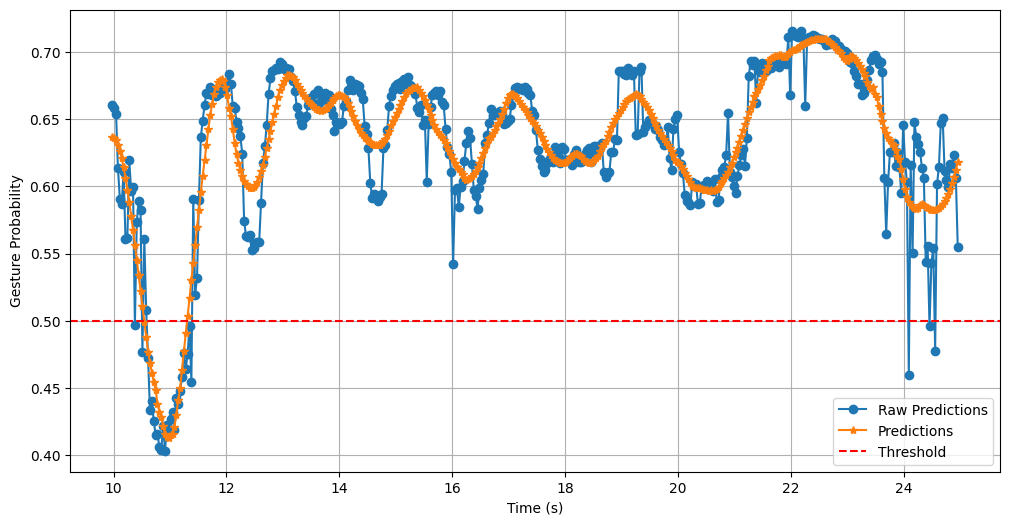

In [66]:

def display_segmented_clip(
    df: pd.DataFrame,
    pair_speaker: str,
    from_ts: float,
    to_ts: float,
    videos_path: str,
    fps: int = pose_data["samplerate"]
) -> None:
    """
    Display a video subclip with per-frame segmentation overlay.

    Args:
        df: DataFrame with 'gesture_bin' column.
        pair_speaker: e.g. '077_B'.
        from_ts: start time (seconds).
        to_ts: end time (seconds).
        videos_path: path template, use videos_path.format(pair, speaker).
        fps: frames per second.
    """
    pair, speaker = pair_speaker.split('_')
    video_path = videos_path.format(pair, speaker)
    clip = VideoFileClip(video_path).subclip(from_ts, to_ts).resize(width=500)

    # Extract binary mask for this speaker
    df_ps = df[df['pair_speaker'] == pair_speaker].reset_index(drop=True)
    start_frame = int(from_ts * fps)
    end_frame = int(to_ts * fps)
    mask = df_ps['gesture_bin'].values[start_frame:end_frame]

    def annotate_frame(frame, t):
        idx = int((t) * fps)
        if idx < len(mask) and mask[idx]:
            # Draw red border when gesture is present
            frame[[0, -1], :] = [255, 0, 0]
            frame[:, [0, -1]] = [255, 0, 0]
        return frame
    gesture_prob = df_ps['gesture_prob'].values[start_frame:end_frame]
    annotated = clip.fl_image(lambda frame: annotate_frame(frame, clip.reader.pos / fps))
    display(annotated.ipython_display(verbose=False, embed=True))
    # Time points for the new data
    time_points_new = np.arange(len(gesture_prob))

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_smoothed_predictions(
    gesture_prob: np.ndarray,
    smoothing_window: int = 40,
    polyorder: int = 3
) -> np.ndarray:
    """
    Smooth a 1D prediction series using a Savitzky-Golay filter.

    Args:
        gesture_prob: Raw gesture probability array.
        smoothing_window: Window length (must be odd and <= len(gesture_prob)).
        polyorder: Polynomial order for smoothing.

    Returns:
        Smoothed prediction array.
    """
    # Ensure odd window length and <= data length
    window = min(smoothing_window, len(gesture_prob))
    if window % 2 == 0:
        window -= 1
    if window < polyorder + 2:
        window = polyorder + 2 + (1 - ((polyorder + 2) % 2))  # make it odd
    window = min(window, len(gesture_prob))
    return savgol_filter(gesture_prob, window_length=window, polyorder=polyorder)


def display_smoothed_plot(
    df: pd.DataFrame,
    pair_speaker: str,
    from_ts: float,
    to_ts: float,
    fps: int = pose_data["samplerate"],
    threshold: float = 0.55
) -> None:
    """
    Plot raw and smoothed gesture probabilities over a time segment.

    Args:
        df: DataFrame with 'gesture_prob'.
        pair_speaker: e.g. '077_B'.
        from_ts: start time (seconds).
        to_ts: end time (seconds).
        fps: frames per second.
    """
    # Subset and extract
    df_ps = df[df['pair_speaker'] == pair_speaker].reset_index(drop=True)
    start_frame = int(from_ts * fps)
    end_frame = int(to_ts * fps)
    gesture_prob = df_ps['gesture_prob'].values[start_frame:end_frame]

    # Smooth
    smoothed = plot_smoothed_predictions(gesture_prob)

    # Build time axis
    times = np.arange(start_frame, end_frame) / fps

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(times, gesture_prob, label='Raw Predictions', linestyle='-', marker='o')
    plt.plot(times, smoothed, label='Predictions', linestyle='-', marker='*')
    # plot the threshold line
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('Gesture Probability')
    # plt.title(f'Gesture Predictions (Raw vs Smoothed) for {pair_speaker}')
    plt.legend()
    plt.grid(True)
    plt.show()


from_ts = 10
to_ts = 25
# Display smoothed predictions for a specific segment
# Display a subclip with segmentation overlay
display_segmented_clip(
    df=segmenation_results_per_frame,
    pair_speaker="077_B",
    from_ts=from_ts,
    to_ts=to_ts,
    videos_path=pose_data["video_output_path"],
    fps=pose_data["samplerate"]
)
display_smoothed_plot(
    df=segmenation_results_per_frame,
    pair_speaker="077_B",
    from_ts=from_ts,
    to_ts=to_ts,
    fps=pose_data["samplerate"],
    threshold=0.50,
)


## 📝 Exercise 1: Compare Model Checkpoints

In Step 2️⃣ you can swap the `--models_type` argument between `"best"` and `"last"` to observe how the segmentation changes.  

1. **Edit the CLI args** below (Cell 7) to select your model:
    ```python
    sys.argv = [
         "run_segmentation_test.py",
         "--config",       "config/segmentation/CABB_segment_basic_test.yaml",
         "--poses-path",   pose_data["output_path"],
         "--phase",        "test",
         "--seed",         "42",
         "--devices",      "0",
         "--models_type",  "last"    # ← try "best" or "last"
    ]
    ```
2. **Rerun Cell 7** and all following cells to regenerate the ELAN file.
3. **Open the `.eaf`** in ELAN alongside the overlay video to compare.

**Discussion Questions**
- 🔍 What differences do you notice between the `"best"` and `"last"` checkpoints?
- 📈 Are the results substantially different?
- 🤔 Does the accuracy of your pose keypoint extraction impact results more than the chosen model checkpoint?

```markdown
## 📝 Exercise 2: Compare Threshold Values

The threshold value determines how confident the model must be to classify a frame as a gesture. In Step 3️⃣ you can adjust the `threshold` parameter in the `get_elan_files` call to see how it affects segmentation.

1. **Edit the threshold** below in step 3️⃣ to try different values, e.g.:
   ```python
   get_elan_files(
      segmentation_results.copy(),
      fps=pose_data["samplerate"],
      model="skeleton",
      threshold=0.45,  # ← try 0.45, 0.50, 0.55, and 0.6.
      file_path=pose_data["output_path"],
      video_output_path=pose_data["video_output_path"],
   )
   ```
2. **Rerun the Cell** (and any following cells) to regenerate the ELAN file.
3. **Open the `.eaf`** in ELAN alongside the overlay video to compare how different thresholds change segment boundaries.

**Discussion Questions**
- 🔍 How does lowering or raising the threshold impact the number of detected segments?
- 📈 Does a more permissive threshold (lower) introduce more false positives?
- 🤔 Which threshold gives the most meaningful segmentation for your video?
```